### Z-TEST

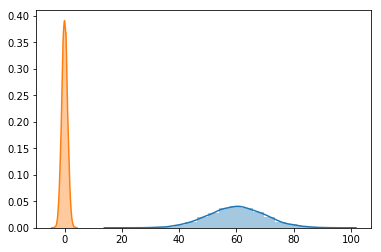

In [29]:
import numpy as np
import seaborn as sns
from scipy.stats import norm


mean_X = 60
std_X = 10


X = np.random.normal(mean_X, std_X, 10000)

sns.distplot(X, hist=True, kde=True, bins=20)

Z = (x - mean_X) / std_X

sns.distplot(Z, hist=True, kde=True, bins=20)

In [53]:
def acc_or_rej(mu, sample_mean, significant_level, N, sigma=None):
        # Calcualte standard deviation of sampling distribution
        sample_std = sigma / np.sqrt(N)
        if N >= 30:
            # Calculate z-score from propulation mean (mu), sample mean and sample std
            z_score = (sample_mean - mu) / sample_std

            # Calculate p-value from z-score
            p_value = 2 * norm.sf(np.abs(z_score))

            # Determine whether to accept or reject null hypothesis
            if p_value <= significant_level:
                print('Reject null hypothesis')
            else:
                print('Accept null hypothesis')
        else:
            t_score = (sample_mean - mu) / np.sqrt(N)

            p_value = 2 * norm.sf(np.abs(t_score))

            if p_value <= significant_level:
                print('Reject null Hypothesis')
            else:
                print('Accept null Hypothesis')

In [50]:
acc_or_rej(1.2, 1.05, 0.05, 100, 0.5)

Reject null hypothesis


### t-test

In [55]:
from scipy import stats
import numpy as np

x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

mu = 175.3

sample_mean = np.array(x).mean()

# Calculate the standard deviation of sample distributuion

N = len(x) # number of data samples

S = np.array(x).std(ddof=1)
den = S /np.sqrt(N)

# t -test from formula
t = (sample_mean - mu)/den
print("t-statistc: {}".format(t))

# one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t-statistc: 2.295568968083183
t =  2.295568968083183 , p =  0.04734137339747034


In [57]:
def z_t_null_hypothesis(data_sample, mu, sigma, significant_level):
    # if sigma is known, calculate using the z-test
    if sigma:
        z_score = (np.mean(data_sample) -mu)/(sigma/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
        # if the data_sample is greater than 30, calculate using the z-test
    elif len(data_sample) >= 30:
        z_score = (np.mean(data_sample) -mu)/(np.std(data_sample)/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    else:
        t, p = stats.ttest_1samp(data_sample, mu)
        if p < significant_level:
            print("reject null hyptothesis")
        else:
            print("accept Null hypothesis")
